In [49]:
import numpy as np

In [11]:
def sample(m, n, std):
    # Generate x as an array of `n` samples which can take a value between 0 and 100
    x = np.random.rand(n) * 100
    b = np.random.randn(n)* std
    y = x * m + b
    return(x,y)

In [12]:
x,y=sample(0.1,50,0.5)

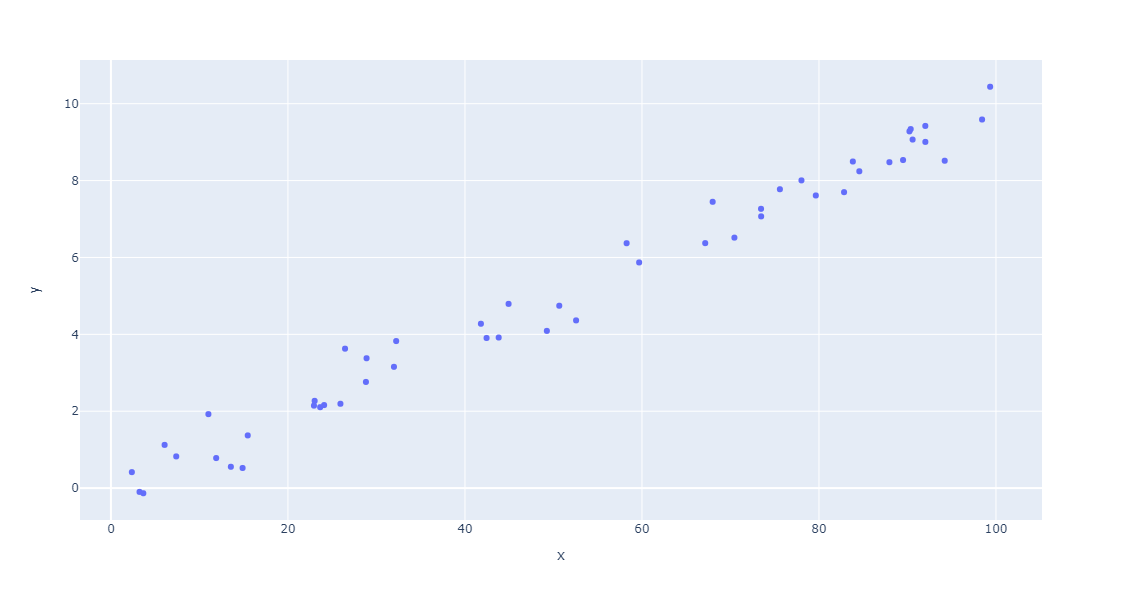

In [13]:
import plotly.express as px
px.scatter(x=x, y=y, height=600)

In [50]:
a=1

In [14]:
import pandas as pd

#tengo q transponer la matriz para q queden x e y en columnas

df = pd.DataFrame(np.array([x, y]).T,columns=['x','y'])


In [15]:
df.head()

,x,y
0,94.210010,8.515923
1,43.811262,3.917030
2,92.022363,9.005932
3,14.875149,0.522767
4,24.086847,2.159488


In [16]:
df['dx']=0.2

In [17]:
df.head()

,x,y,dx
0,94.210010,8.515923,0.2
1,43.811262,3.917030,0.2
2,92.022363,9.005932,0.2
3,14.875149,0.522767,0.2
4,24.086847,2.159488,0.2


In [37]:
df['dy']=0.5

In [38]:
df.head()

,x,y,dx,dy,ymin,ymax
0,2.362503,0.415047,0.2,0.5,-0.084953,0.915047
1,3.231265,-0.099254,0.2,0.5,-0.599254,0.400746
2,3.658966,-0.134268,0.2,0.5,-0.634268,0.365732
3,6.063740,1.123773,0.2,0.5,0.623773,1.623773
4,7.376960,0.824087,0.2,0.5,0.324087,1.324087


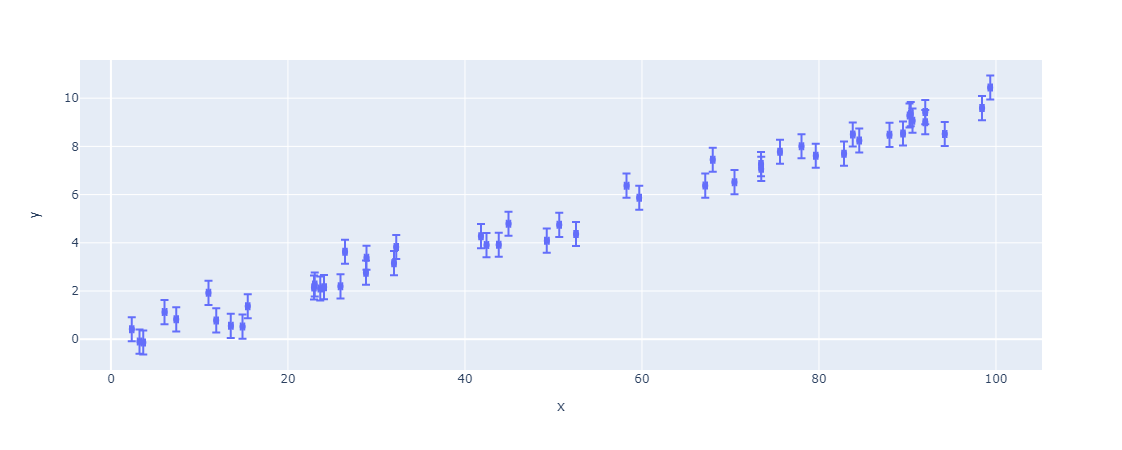

In [39]:
fig = px.scatter(df, x='x', y='y', error_x="dx", error_y="dy")
fig.show()

## Nuestro objetivo es medir g a partir de la siguiente relacion:




$$\Large \frac{1}{\tau^2} = \left (  \frac{1}{4\pi^2} \cdot g \right ) \frac{1}{l}  $$


Haciendo unos cambios de variables:

$\large y = \frac{1}{\tau^2} $

$\large x = \frac{1}{l} $

Y renombrando la constante:

$\large m = \frac{1}{4\pi^2} \cdot g $ 

Tenemos:

$$\Large y = m x + b $$

Donde en principio b es 0




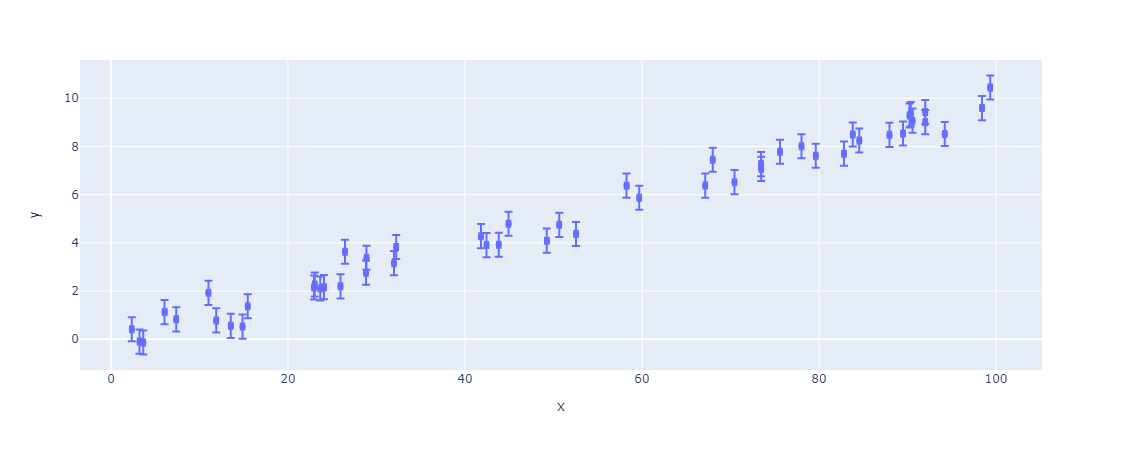

In [21]:
fig = px.scatter(df, x=x, y=y, error_x="dx", error_y="dy")
fig.show()

In [22]:
df.head()

,x,y,dx,dy
0,94.210010,8.515923,0.2,0.5
1,43.811262,3.917030,0.2,0.5
2,92.022363,9.005932,0.2,0.5
3,14.875149,0.522767,0.2,0.5
4,24.086847,2.159488,0.2,0.5


In [23]:
df['ymin']=df['y']-df['dy']

In [24]:
df['ymax']=df['y']+df['dy']

In [25]:
df.head()

,x,y,dx,dy,ymin,ymax
0,94.210010,8.515923,0.2,0.5,8.015923,9.015923
1,43.811262,3.917030,0.2,0.5,3.417030,4.417030
2,92.022363,9.005932,0.2,0.5,8.505932,9.505932
3,14.875149,0.522767,0.2,0.5,0.022767,1.022767
4,24.086847,2.159488,0.2,0.5,1.659488,2.659488


In [26]:
df=df.sort_values(by=['x'],ignore_index=True)

In [27]:
df.head()

,x,y,dx,dy,ymin,ymax
0,2.362503,0.415047,0.2,0.5,-0.084953,0.915047
1,3.231265,-0.099254,0.2,0.5,-0.599254,0.400746
2,3.658966,-0.134268,0.2,0.5,-0.634268,0.365732
3,6.063740,1.123773,0.2,0.5,0.623773,1.623773
4,7.376960,0.824087,0.2,0.5,0.324087,1.324087


In [28]:
def rectas(df):
    mmin=(df.iloc[-1].ymin - df.iloc[0].ymax)/(df.iloc[-1].x - df.iloc[0].x)
    mmax=(df.iloc[-1].ymax - df.iloc[0].ymin)/(df.iloc[-1].x - df.iloc[0].x)
    return(mmin,mmax)


In [29]:
m1,m2=rectas(df)

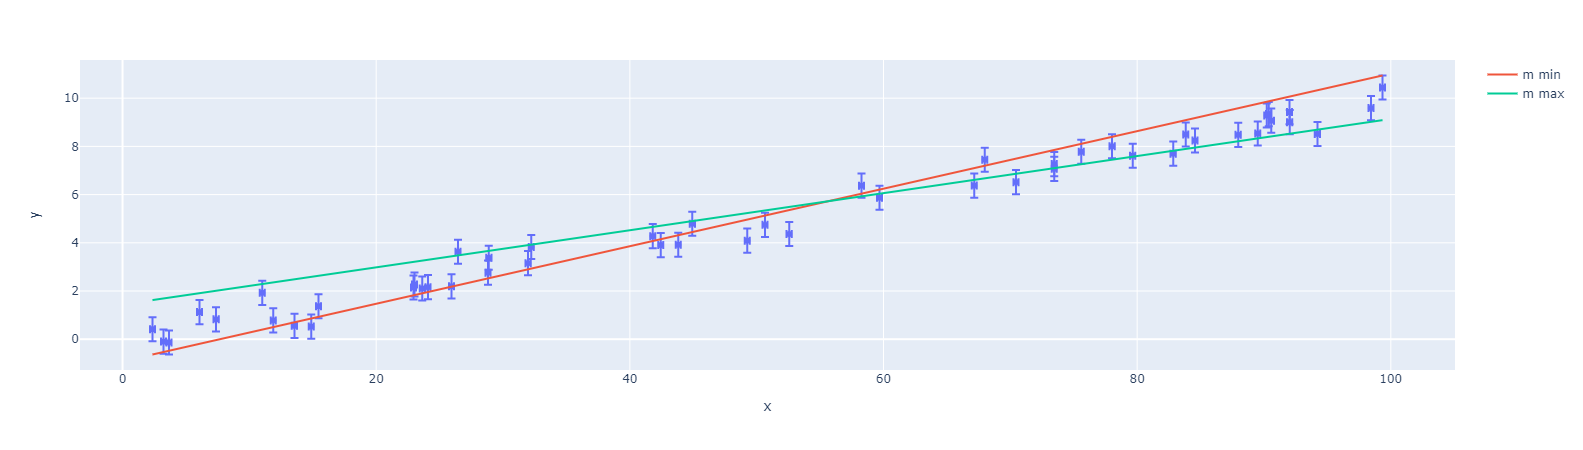

In [48]:
fig = px.scatter(df, x=x, y=y, error_x="dx", error_y="dy")
fig.add_scatter(x=[df.iloc[0].x,df.iloc[-1].x], y=[df.iloc[2].ymin , df.iloc[-1].ymax], mode='lines',name='m min')
fig.add_scatter(x=[df.iloc[0].x,df.iloc[-1].x], y=[df.iloc[3].ymax , df.iloc[-2].ymin], mode='lines',name='m max')

fig.show()

In [ ]:
p_m=(x_m,y_m)

In [ ]:
m=(mmax-mmin)/2

ptmedio

>recta